# Project 2 Kaggle Submission Process

# Import

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('./datasets/train.csv')
#kaggle_test = pd.read_csv('./datasets/test.csv')
test = pd.read_csv('./datasets/test.csv')
train_ids = train['Id']
test_ids = test['Id']

# Understand Data

In [3]:
pd.set_option('display.max_columns', None)
train.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.shape

(2051, 81)

In [5]:
# rename columns

train.rename(columns = {'Overall Qual': 'OverallQual', 'Year Built': 'YearBuilt', 'TotRms AbvGrd': 'TotRmesAbvGrd', 'Gr Liv Area': 'GrLivArea', 'Full Bath': 'FullBath'}, inplace = True)

In [6]:
# my datafram
to_consider = train[['OverallQual', 'YearBuilt', 'TotRmesAbvGrd', 'GrLivArea', 'FullBath', 'SalePrice']]

In [7]:
to_consider.describe()

,OverallQual,YearBuilt,TotRmesAbvGrd,GrLivArea,FullBath,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,6.112140,1971.708922,6.435885,1499.330083,1.577279,181469.701609
std,1.426271,30.177889,1.560225,500.447829,0.549279,79258.659352
min,1.000000,1872.000000,2.000000,334.000000,0.000000,12789.000000
25%,5.000000,1953.500000,5.000000,1129.000000,1.000000,129825.000000
50%,6.000000,1974.000000,6.000000,1444.000000,2.000000,162500.000000
75%,7.000000,2001.000000,7.000000,1728.500000,2.000000,214000.000000
max,10.000000,2010.000000,15.000000,5642.000000,4.000000,611657.000000


# Kaggle Testing Data

In [8]:
##kaggle_test.rename(columns = {'Overall Qual': 'OverallQual', 'Year Built': 'YearBuilt', 'TotRms AbvGrd': 'TotRmesAbvGrd', 'Gr Liv Area': 'GrLivArea', 'Full Bath': 'FullBath'}, inplace = True)

In [9]:
##kaggle_test = kaggle_test[['OverallQual', 'YearBuilt', 'TotRmesAbvGrd', 'GrLivArea', 'FullBath']]

# Data Cleaning

In [10]:
to_consider.head()

,OverallQual,YearBuilt,TotRmesAbvGrd,GrLivArea,FullBath,SalePrice
0,6,1976,6,1479,2,130500
1,7,1996,8,2122,2,220000
2,5,1953,5,1057,1,109000
3,5,2006,7,1444,2,174000
4,6,1900,6,1445,2,138500


In [11]:
to_consider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OverallQual    2051 non-null   int64
 1   YearBuilt      2051 non-null   int64
 2   TotRmesAbvGrd  2051 non-null   int64
 3   GrLivArea      2051 non-null   int64
 4   FullBath       2051 non-null   int64
 5   SalePrice      2051 non-null   int64
dtypes: int64(6)
memory usage: 96.3 KB


In [12]:
to_consider.isnull().sum()

OverallQual      0
YearBuilt        0
TotRmesAbvGrd    0
GrLivArea        0
FullBath         0
SalePrice        0
dtype: int64

# EDA

In [13]:
corr = to_consider.corr()

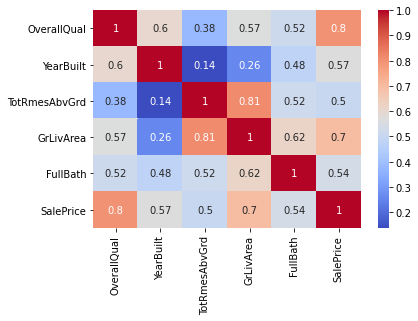

In [14]:
sns.heatmap(to_consider.corr(), annot = True, cmap = 'coolwarm');

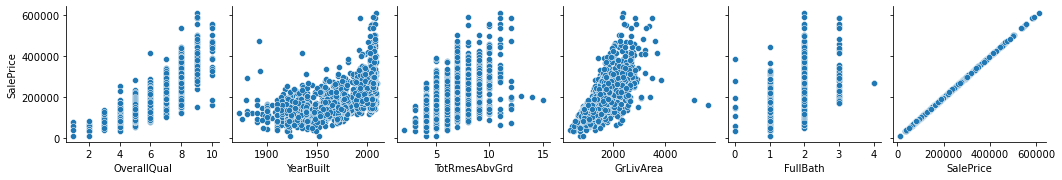

In [15]:
#plt.figure(figsize = (5, 5))
sns.pairplot(to_consider, x_vars = list(to_consider.columns).remove('SalePrice'), y_vars = ['SalePrice'], diag_kind = None);

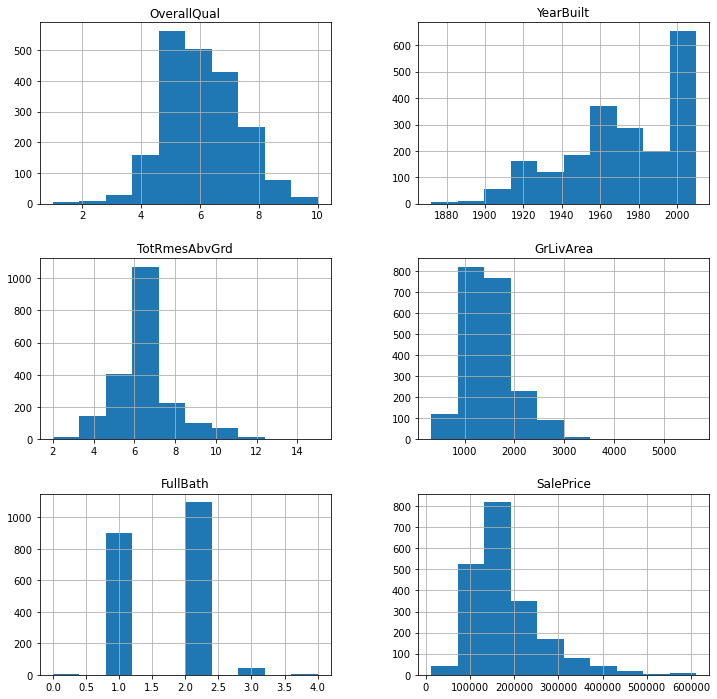

In [16]:
# the histogram shows that our target 'SalePrice' is not normal distribution and it has right tail
to_consider.hist(figsize = (12, 12));

Create features matrix (X) and target (y)

In [17]:
features = train[['OverallQual', 'YearBuilt', 'TotRmesAbvGrd', 'GrLivArea', 'FullBath']]
target = train['SalePrice']

C:\Users\gc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


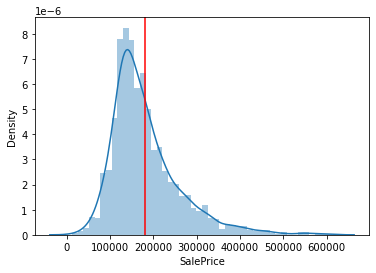

In [18]:
# drew the plot and understand that SalePrice's is not a normal distribution. 
# 1. Deviate from the normal distribution.
# 2. Have appreciable positive skewness.
# 3. Show peakedness.

sns.distplot(to_consider['SalePrice']);
plt.axvline(to_consider['SalePrice'].mean(), color = 'r');

In [19]:
# check the skewness and the kurtosis
print("Skewness: %f" % to_consider['SalePrice'].skew())
print("Kurtosis: %f" % to_consider['SalePrice'].kurt())

Skewness: 1.557551
Kurtosis: 3.579003


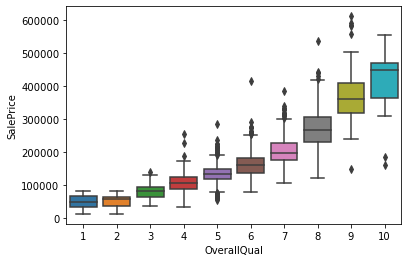

In [20]:
# the OverallQual has big impact the house SalePrice
sns.boxplot(data = to_consider, x = 'OverallQual', y = 'SalePrice');

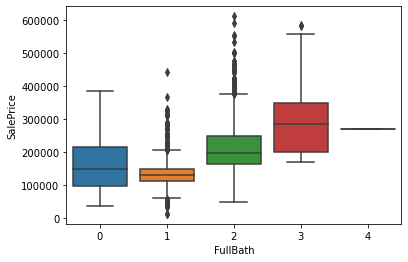

In [21]:
sns.boxplot(data = to_consider, x = 'FullBath', y = 'SalePrice');

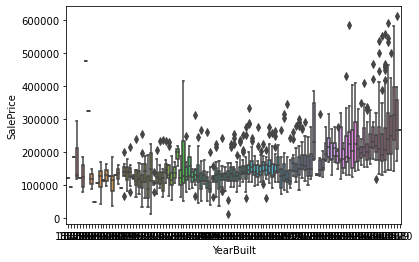

In [22]:
sns.boxplot(data = to_consider, x = 'YearBuilt', y = 'SalePrice');

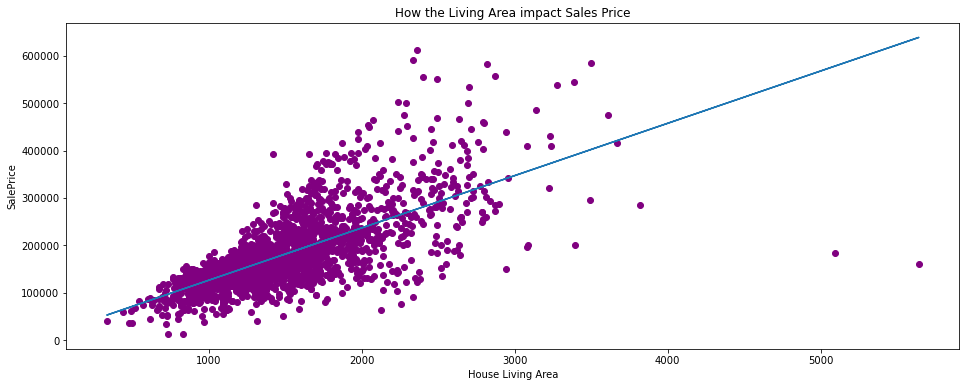

In [23]:
plt.figure(figsize = (16, 6))
plt.scatter(x = to_consider['GrLivArea'], y = to_consider['SalePrice'], color = 'purple');
plt.title('How the Living Area impact Sales Price');
plt.xlabel('House Living Area')
plt.ylabel('SalePrice');

m, b = np.polyfit(to_consider['GrLivArea'], to_consider['SalePrice'], 1)
plt.plot(to_consider['GrLivArea'], m * to_consider['GrLivArea'] + b);

# Keep outliers in this moment
From the graph above, I saw outliers - two houses (960 and 1855) have big living area with lower sale price.  This can be a signal that the house might have lower quality.  Considering taking those outliers can be dangerous, I decide to keep it where it is for this project.  

In [24]:
to_consider[to_consider['GrLivArea'] > 5000]

,OverallQual,YearBuilt,TotRmesAbvGrd,GrLivArea,FullBath,SalePrice
960,10,2008,12,5642,2,160000
1885,10,2008,15,5095,2,183850


# Model Preparation

The Null Model

In [25]:
to_consider.mean()

OverallQual           6.112140
YearBuilt          1971.708922
TotRmesAbvGrd         6.435885
GrLivArea          1499.330083
FullBath              1.577279
SalePrice        181469.701609
dtype: float64

In [26]:
to_consider.median()

OverallQual           6.0
YearBuilt          1974.0
TotRmesAbvGrd         6.0
GrLivArea          1444.0
FullBath              2.0
SalePrice        162500.0
dtype: float64

OLS

C:\Users\gc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


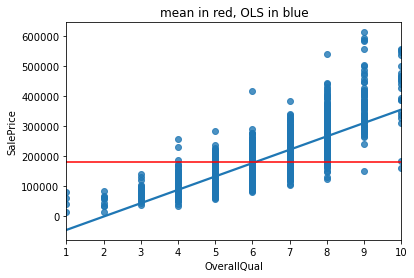

In [27]:
sns.regplot('OverallQual', 'SalePrice', to_consider, ci = None);
plt.axhline(to_consider['SalePrice'].mean(), c = 'red')
plt.title('mean in red, OLS in blue');

C:\Users\gc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


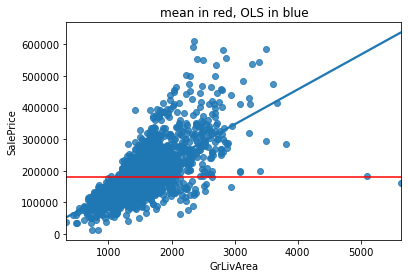

In [28]:
sns.regplot('GrLivArea', 'SalePrice', to_consider, ci = None);
plt.axhline(to_consider['SalePrice'].mean(), c = 'red')
plt.title('mean in red, OLS in blue');

In [29]:
to_consider.columns

Index(['OverallQual', 'YearBuilt', 'TotRmesAbvGrd', 'GrLivArea', 'FullBath',
       'SalePrice'],
      dtype='object')

In [30]:
# Use the train_test_split function to split our X and y variables into a training set and a holdout set.

X = to_consider[['OverallQual', 'YearBuilt', 'TotRmesAbvGrd', 'GrLivArea', 'FullBath']]
y = to_consider['SalePrice']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [32]:
# in order to evaluate LinearRegression, I need to create instances of all three models
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
lr.intercept_

-1130431.5968950137

In [35]:
lr.coef_

array([26423.23390125,   540.42648356,   587.5940617 ,    61.83117273,
       -7598.51335471])

Interpreting Slopes on overall quality:

All else held equal, for a one-unit increase in overall quality, we expect to see a price sales increase of about 0.14 units.

In [36]:
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(len(X.columns))]

['OverallQual: 26423.23390125459',
 'YearBuilt: 540.4264835630183',
 'TotRmesAbvGrd: 587.5940616993827',
 'GrLivArea: 61.831172733250135',
 'FullBath: -7598.51335471143']

Making predictions

In [37]:
y_pred = lr.predict(X_train)
y_pred

array([180330.60846536, 238023.0527388 , 104277.80575446, ...,
       171186.14712752, 149114.80357316, 218005.08361879])

In [38]:
#plt.scatter(to_consider['OverallQual'], to_consider['SalePrice'])
#plt.scatter(to_consider['OverallQual'], y_pred, color = 'orange');

In [39]:
y_pred

array([180330.60846536, 238023.0527388 , 104277.80575446, ...,
       171186.14712752, 149114.80357316, 218005.08361879])

In [40]:
#resids = y - y_pred

In [41]:
#mse = np.mean(resids**2)

In [42]:
cross_val_score(lr, X_train, y_train, cv = 5)

array([0.76251019, 0.76316346, 0.76648484, 0.74358747, 0.61624788])

In [43]:
# Use cross_val_score to evaluate all three models
cross_val_score(lr, X_train, y_train, cv =3).mean()

0.7313757470817327

In [44]:
to_consider.head()

,OverallQual,YearBuilt,TotRmesAbvGrd,GrLivArea,FullBath,SalePrice
0,6,1976,6,1479,2,130500
1,7,1996,8,2122,2,220000
2,5,1953,5,1057,1,109000
3,5,2006,7,1444,2,174000
4,6,1900,6,1445,2,138500


In [45]:
#baseline model.  look for true vs. 
# my baseline score is zero
r2_score(y_test, [y_test.mean()] * len(y_test)) 


0.0

# Model Fitting and Evaluation
Fit the model to the training data, and evaluate the training and test scores below.

In [46]:
#lr.fit(X_train, y_train)

LinearRegression()

In [47]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7431583618119589, 0.7785732426163776)

In [59]:
test_preds = lr.predict(X_test)

In [60]:
test_preds

array([124481.29393479, 239883.07246846, 285372.6294006 , 160787.51504284,
       234943.44520131, 295798.24242848, 198896.47029133, 279473.42235047,
       152241.81149699, 111022.03219509, 111217.02324359, 216825.52111403,
       164818.49236968, 128625.61885173, 139694.89225626, 101844.03363744,
       149655.23005673, 233074.84105969, 334479.56515037, 213493.44019454,
       224252.41717626, 210999.72191748, 161145.79320322, 105627.05762367,
       139394.53212056, 249151.69068801, 200808.44493104, 127412.95356993,
       263054.45693998,  81828.85852948, 296309.63024144,  89743.95449159,
       129203.67246779, 199343.35330156, 233306.11167959,  97951.44639408,
       165878.60255958, 233757.36907117, 299695.2853057 , 125569.15657611,
       220550.45091409, 230956.14864748, 320239.89183173, 189960.57026684,
       103841.46187477, 168025.24905776, 108034.84369659, 112649.26102903,
       306968.75739051, 144771.45903694, 291638.10930788,  52150.49441103,
       124461.4642759 , 2

# Check Residuals
LINE Assumptions
The assumptions necessary to conduct a proper linear regression are easily remembered by the "LINE" acronym:

L - Linearity: there is a linear relationship between x and y (fix: apply non-linear transformation)

I - Independence of residuals (usually assumed)

N - Normality: residuals are normally distributed (fix: log y variable)

E - Equality of variance: residuals have constant variance (fix: check outliers, non-linear transformation)

In [50]:
residuals = y_test - preds

In [51]:
residuals

1124     8018.706065
188    -13883.072468
1727   -35372.629401
1658   -32787.515043
1424   -31783.445201
            ...     
572    -16250.844226
548      4992.660378
530    -34911.675665
445      2694.663571
693    -17071.611467
Name: SalePrice, Length: 513, dtype: float64

In [52]:
# mean of residuals
round(residuals.mean(), 3)

1331.416

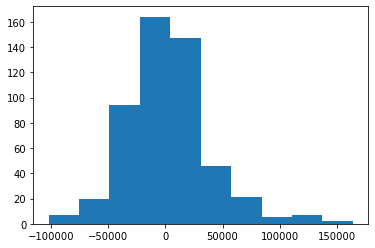

In [53]:
plt.hist(residuals);


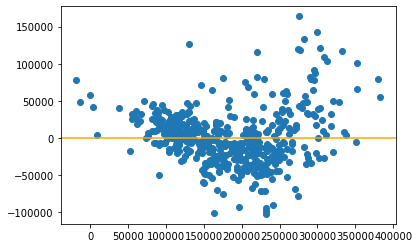

In [54]:
plt.scatter(preds, residuals)
plt.axhline(0, color='orange');

I can see that the distribution is not a normal distribution, but most of the values are around the mean. I can perform a power transformation on the target so it will take on a normal distribution, which should result in our residuals taking on a normal distribution.

(array([  2.,   0.,   6.,  13.,  81., 440., 835., 462., 177.,  35.]),
 array([ 9.45634071,  9.84309933, 10.22985795, 10.61661658, 11.0033752 ,
        11.39013383, 11.77689245, 12.16365107, 12.5504097 , 12.93716832,
        13.32392695]),
 <BarContainer object of 10 artists>)

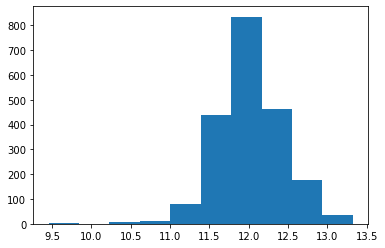

In [55]:
plt.hist(np.log(to_consider['SalePrice']))

check violated assumptions

In [56]:
# Calcuate MAE by hand
np.abs(residuals).mean()

26992.123639378166

In [62]:
# Via sklearn.metrics
metrics.mean_absolute_error(y_test, preds)

26992.123639378173

Make a quick model run through with the log transformed target

In [63]:
X = to_consider[['OverallQual', 'YearBuilt', 'TotRmesAbvGrd', 'GrLivArea', 'FullBath']]
y = np.log(to_consider['SalePrice'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [65]:
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7870948662958206, 0.7905485853922427)

In [102]:
log_pred = lr.predict(X_test)

In [130]:
# rmse
rmse = metrics.mean_squared_error(np.exp(y_test), np.exp(log_pred), squared=False)

In [131]:
rmse

33612.327986636046

In [99]:
log_resid = y_test - log_pred

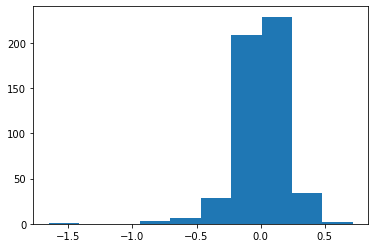

In [100]:
plt.hist(log_resid);

In [70]:
# may not need this one
# list(zip(X.columns, (lr.coef_)))

In [71]:
zip(X.columns, np.exp(lr.coef_))

# Scale the data.  # Relabeling scaled data as "Z" is common.


In [72]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [73]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1538, 5)
y_train shape is: (1538,)
Z_test shape is: (513, 5)
y_test shape is: (513,)


# LASSO, Ridge

Ridge

In [74]:
# Instantiate.
ridge = Ridge(alpha = 10.0)

# Fit.
ridge.fit(Z_train, y_train)

# Evaluate model using R2.
print(f'Training Ridge R-Squared:  {ridge.score(Z_train, y_train)}')
print(f'Testing Ridge R-Squared:  {ridge.score(Z_test, y_test)}')

Training Ridge R-Squared:  0.7870702677721517
Testing Ridge R-Squared:  0.7899123572681171


In [75]:
np.linspace(0, 10, 21)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [76]:
np.logspace(0, 3, 21)

array([   1.        ,    1.41253754,    1.99526231,    2.81838293,
          3.98107171,    5.62341325,    7.94328235,   11.22018454,
         15.84893192,   22.38721139,   31.6227766 ,   44.66835922,
         63.09573445,   89.12509381,  125.89254118,  177.827941  ,
        251.18864315,  354.81338923,  501.18723363,  707.94578438,
       1000.        ])

In [77]:
from sklearn.linear_model import RidgeCV

In [78]:
r_alphas = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas = r_alphas, scoring = 'r2', cv = 5)
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [79]:
# Here is the optimal value of alpha
ridge_cv.alpha_

36.78379771828632

R2 for the ridge_model object 

In [80]:
print(f'Training RidgeCV:  {ridge_cv.score(Z_train, y_train)}')
print(f'Testing RidgeCV:  {ridge_cv.score(Z_test, y_test)}')

Training RidgeCV:  0.7867968596811882
Testing RidgeCV:  0.7881703836747072


In [107]:
ridge = Ridge(alpha = 0.1, normalize = True)

In [108]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True)

In [109]:
ridge_pred = ridge.predict(X_test)

In [137]:
#ridge_pred

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
mean = mean_squared_error(y_test, ridge_pred)

In [119]:
rmse_ridge = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(ridge_pred)))

In [120]:
rmse_ridge

35277.752341545456

# Kaggle_test

In [81]:
##kaggle_test = sc.transform(kaggle_test)

In [82]:
# model built was based on logged model.  now have to do np.exp
#kaggle_test_ridge_preds = np.exp(ridge.predict(kaggle_test))

In [83]:
## kaggle_test_ridge_preds

In [84]:
##kaggle_submission = {
    ##'Id': test_ids,
    ##'SalePrice': kaggle_test_ridge_preds}

##kaggle_submission = pd.DataFrame(kaggle_submission)

In [85]:
##kaggle_submission

In [86]:
##kaggle_submission.to_csv('./datasets/kaggle_submission.csv', index=False)

LASSO

In [87]:
from sklearn.linear_model import Lasso, LassoCV

In [92]:
# Reminders

print(" Ridge ".center(18, "="))
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

===== Ridge ======
0.7867968596811882
0.7881703836747072


In [93]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas, cv = 5)
# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5)

In [94]:
# Here is the optimal value of alpha
lasso_cv.alpha_

0.006579332246575682

In [95]:
print(f'Training LASSO R_Squared:  {lasso_cv.score(Z_train, y_train)}')
print(f'Testing LASSO R_Squared:  {lasso_cv.score(Z_test, y_test)}')

Training LASSO R_Squared:  0.7862851949031171
Testing LASSO R_Squared:  0.7880428585438313


In [123]:
lasso_pred = lasso_cv.predict(Z_test)

In [136]:
lasso_pred

In [126]:
lasso_mean = mean_squared_error(y_test, lasso_cv.predict(X_test))

In [127]:
lasso_mean

165561.2657604634

In [133]:
rmse_lasso = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(lasso_pred)))

In [134]:
rmse_lasso

34051.57325362071